In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("D:\Projects\sara.mov\public\output.csv")

In [4]:
df

,id,imdb_id,title,tags
0,27205,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es..."
1,157336,tt0816692,Interstellar,The adventures of a group of explorers who mak...
2,155,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...
3,19995,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di..."
4,24428,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...
...,...,...,...,...
55502,762126,NaN,We Bare Bears Film: Bear Brothers,A compilation film released in South Korean th...
55503,762137,NaN,We Bare Bears Film: Baby Bears,A compilation film released in South Korean th...
55504,762145,tt0439678,Lights,Lights reminds us to stand up for what we beli...
55505,762148,NaN,Rambam - The Story of Maimonides,"Rambam was born in Cordova, Spain in the 12th ..."


In [5]:
df.tags=df.tags.apply(lambda x:x.lower())

In [6]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [7]:
def stm(o):
    y=[]
    for i in o.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [8]:
df.tags=df.tags.apply(stm)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words="english")

In [10]:
vectors=cv.fit_transform(df["tags"]).toarray()

In [11]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zone', 'zoo', 'éireann'], dtype=object)

In [12]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans
arr=[]
for i in range(1,20):
    mdl=KMeans(n_clusters=i)
    mdl.fit(vectors)
    labels = mdl.fit_predict(vectors)
    arr.append(mdl.inertia_)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(vectors)

print("Original shape:", vectors.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (55507, 5000)
Reduced shape: (55507, 3)


Text(0.5, 0, 'No. of Clusters')

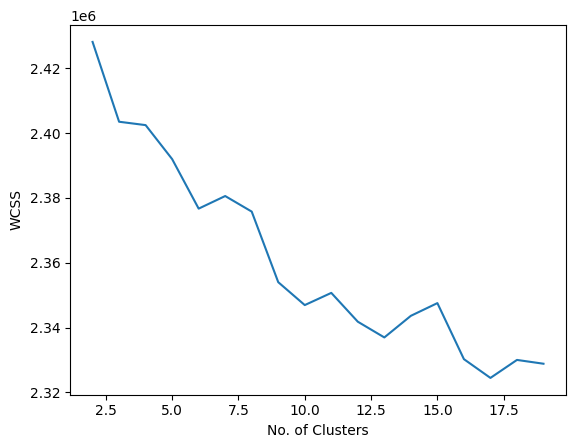

In [ ]:
#plt.figure(figsize=(12, 6))
plt.plot(range(2,20),arr)

plt.ylabel("WCSS")
plt.xlabel("No. of Clusters")

In [ ]:
kmeans=KMeans(n_clusters=12)
lab=kmeans.fit_predict(vectors)

In [ ]:
lab

array([ 8, 10,  0, ...,  9, 10,  0], dtype=int32)

In [ ]:
l={}
lab=list(lab)
for i in range(12):
  l[i]=lab.count(i)

In [ ]:
l

{0: 24909,
 1: 10272,
 2: 1584,
 3: 377,
 4: 1,
 5: 2224,
 6: 3050,
 7: 1,
 8: 6639,
 9: 5415,
 10: 1034,
 11: 1}

<BarContainer object of 12 artists>

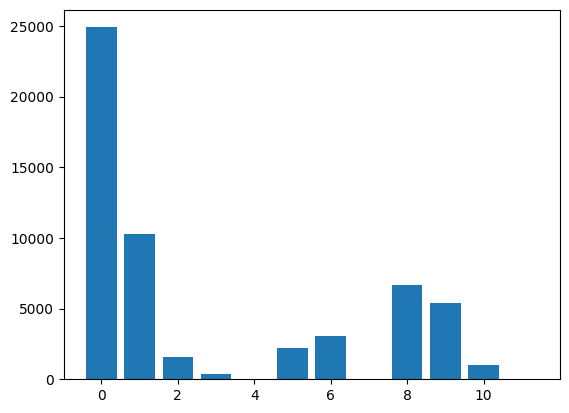

In [ ]:
plt.bar(l.keys(),l.values())

In [ ]:
df

,id,imdb_id,title,tags,cluster
0,27205,tt1375666,Inception,"cobb, a skill thief who commit corpor espionag...",8
1,157336,tt0816692,Interstellar,the adventur of a group of explor who make use...,10
2,155,tt0468569,The Dark Knight,batman rais the stake in hi war on crime. with...,0
3,19995,tt0499549,Avatar,"in the 22nd century, a parapleg marin is dispa...",2
4,24428,tt0848228,The Avengers,when an unexpect enemi emerg and threaten glob...,0
...,...,...,...,...,...
55502,762126,NaN,We Bare Bears Film: Bear Brothers,a compil film releas in south korean theaters....,0
55503,762137,NaN,We Bare Bears Film: Baby Bears,a compil film releas in south korean theaters....,0
55504,762145,tt0439678,Lights,light remind us to stand up for what we believ...,9
55505,762148,NaN,Rambam - The Story of Maimonides,"rambam wa born in cordova, spain in the 12th c...",10


In [ ]:
df["cluster"]=lab

In [ ]:
df

,id,imdb_id,title,tags,cluster
0,27205,tt1375666,Inception,"cobb, a skill thief who commit corpor espionag...",8
1,157336,tt0816692,Interstellar,the adventur of a group of explor who make use...,10
2,155,tt0468569,The Dark Knight,batman rais the stake in hi war on crime. with...,0
3,19995,tt0499549,Avatar,"in the 22nd century, a parapleg marin is dispa...",2
4,24428,tt0848228,The Avengers,when an unexpect enemi emerg and threaten glob...,0
...,...,...,...,...,...
55502,762126,NaN,We Bare Bears Film: Bear Brothers,a compil film releas in south korean theaters....,0
55503,762137,NaN,We Bare Bears Film: Baby Bears,a compil film releas in south korean theaters....,0
55504,762145,tt0439678,Lights,light remind us to stand up for what we believ...,9
55505,762148,NaN,Rambam - The Story of Maimonides,"rambam wa born in cordova, spain in the 12th c...",10


In [ ]:
df[df["cluster"]==1]

,id,imdb_id,title,tags,cluster
81,496243,tt6751668,Parasite,"all unemployed, ki-taek' famili take peculiar ...",1
116,339403,tt3890160,Baby Driver,"after be coerc into work for a crime boss, a y...",1
252,372058,tt5311514,Your Name.,high schooler mitsuha and taki are complet str...,1
269,12405,tt1010048,Slumdog Millionaire,a teenag reflect on hi life after be accus of ...,1
348,4935,tt0347149,Howl's Moving Castle,"sophie, a young milliner, is turn into an elde...",1
...,...,...,...,...,...
55485,764000,tt0806151,Peladão - Elf Freunde und eine Königin,everi year the biggest and craziest soccer tou...,1
55490,765227,tt0166666,Jack and the Beanstalk: The ITV Pantomime,a televis pantomim of jack and the beanstalk f...,1
55494,762915,tt12969358,I Am Norman,a man live in hi car take a filmmak into the w...,1
55499,762311,tt12289760,Sisters,"meabh, a spirit fifteen-year-old, shield her t...",1


In [ ]:
df.to_csv('clustered.csv', index=False)

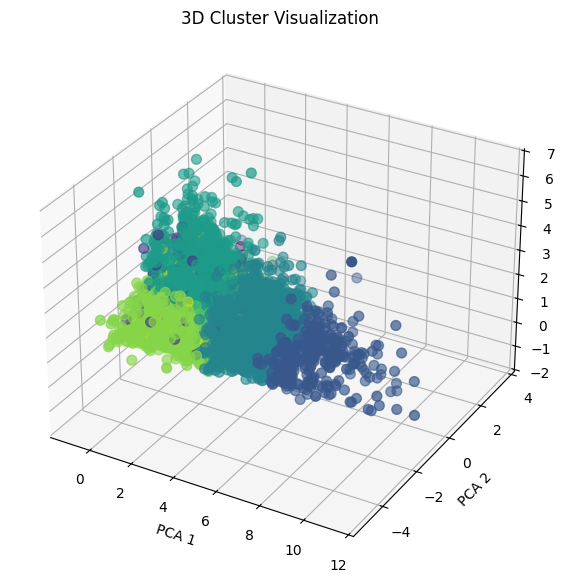

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=lab, cmap='viridis', s=50)

ax.set_title("3D Cluster Visualization")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.show()

In [ ]:
l={}
lab=list(lab)
for i in range(12):
  l[i]=lab.count(i)


